# EXPLORING GLOBAL GREENHOUSE GAS EMISSION PATTERNS WITH UNSUPERVISED MACHINE LEARNING
Group Members : Sanjay Ramesh Kannan, Prasanth Gururaj, Michelle Rhea Sathish 

### INTRODUCTION:

One of the most concerning issues of this century is Global Warming and understanding its contributing factors can help implement effective solutions. The different Greenhouse gases such as Carbon Dioxide (CO2), methane and nitrous oxide are emitted significantly, varying across countries depending on the energy sources, population and industrial activity.

Our goal here is to find out how countries differ based on their greenhouse gas emissions from the year 2000 to 2022 and based on these differences we can discover the underlying patterns of this outcome.

To achieve this goal ,we use Unsupervised Machine Learning techniques such as Principal Component Analysis(PCA) , Singular Value Decomposition (SVD), K-means Clustering and Hierarchical Clustering.

To analyze and explore the patterns of CO2 and Green House Gas emissions across Countries ,we used the [CO2 and Greenhouse Gas Emissions Data](https://ourworldindata.org/co2-and-greenhouse-gas-emissions) sourced from [Our World in Data](https://data.worldbank.org). 
The original dataset was huge — over 50000 rows and 79 columns — with everything from country level CO₂ emissions to broader climate metrics. It had raw totals like CO₂ from coal, oil, and gas, but also more nuanced stats like emissions per person, methane levels, and even estimated temperature change linked to national emissions.A lot of it was interesting, but not all of it was useful for pattern detection.
So, we trimmed it down. Using the variable definitions from the [Codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv), we pulled together a streamlined set of features that help answer our question, that includes:
* Demographics (GDP, year)
* Emission sources (coal, oil, gas, cement, and more)
* CO₂ intensity (per capita, per GDP)
* Global contribution (share of global CO₂)
* Climate impact metrics (methane, nitrous oxide, total GHGs, temperature change)

From this, we created a clean working dataset — [Filtered_CO2.csv](https://github.com/Prasanth-Gururaj/co2_emission_PCA/blob/main/Filtered_CO2.csv) — with just the indicators that matter most. That gave us a solid foundation for analysis between 2000 and 2022.

---

### THEORETICAL BACKGROUND:

#### What is Unsupervised Machine Learning?

Unsupervised Machine Learning (UML) is a branch of ML that deals with unlabelled data. Unlike supervised ML, where the goal is to predict or create patterns from a known or labelled output, Unsupervised ML explores the input data and understands its structure with no such guidance.

In Unsupervised ML, only feature variables are present in the data with no target variables from which the algorithms discover the structure of the data.

#### Types of Unsupervised Learning Algorithms:

1. **Dimensionality Reduction**  
2. **Clustering**

### 1. Dimensionality Reduction

Dimensionality reduction techniques reduce the number of input features while preserving as much important information as possible. In high-dimensional datasets, many features may be irrelevant, redundant, or just noisy. These techniques help compress the data into a lower-dimensional space where patterns are easier to observe — all without predefined labels.

#### Common Algorithms for Dimensionality Reduction:

**a) Principal Component Analysis (PCA):**  
PCA linearly combines original features into principal components (axes) that capture the maximum variance in the data.

**Working Principle:**

- Standardize the data  
- Compute the covariance matrix:  
  $$
  \Sigma = \frac{1}{n} X^T X
  $$
- Compute eigenvectors and eigenvalues of $\Sigma$  
- Sort the eigenvalues and retain the top *k* values  
- Project data onto the top *k* eigenvectors  
- The result is reduced data with uncorrelated features capturing the highest variance.

**b) Singular Value Decomposition (SVD):**  
SVD is a matrix factorization technique closely related to PCA.A powerful linear algebra tool that decomposes the standardized data into components ranked by how much “energy” or structure they capture. After pre-scaling the data, SVD decomposes $X$ as:

$$
X = U \Sigma V^T
$$

Where:  
- $U$: left singular vectors  
- $\Sigma$: diagonal matrix of singular values  
- $V^T$: right singular vectors (transposed)


---



### 2) Clustering

Clustering is the task of grouping similar data points into clusters, where points in a cluster are more similar to each other and dissimilar to those in other clusters.

#### Common Clustering Algorithms:

**K-Means Clustering:**  
- First, it randomly initializes *k* centroids.  
- Assigns each point to the nearest centroid using the Euclidean distance.  
- Updates each centroid as the average of points assigned to it.  
- Iterates this process until centroids no longer change significantly.

The objective function minimized by K-Means is:

$$
\min \sum_{i=1}^{K} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
$$

Where:  
- $K$ = number of clusters  
- $C_i$ = cluster $i$  
- $x_j$ = data point  
- $\mu_i$ = centroid of cluster $i$


**Hierarchical Clustering:**  
Hierarchical clustering builds a tree-like structure (dendrogram) that shows how points are grouped step-by-step from individuals to bigger clusters.

There are two types:

- **1) Agglomerative (Bottom-Up):**  
  Starts with each point as its own cluster.  
  Calculates distances between all clusters using Euclidean distance.  
  At each step, merges the two closest clusters.  
  Recalculates distances and repeats until all points form one big cluster.

- **2) Divisive (Top-Down):**  
  Starts with one big cluster.  
  Repeatedly splits clusters until each point is its own cluster.


**Dendrogram:**  
A tree-like diagram that shows which clusters were merged and at what distance.  
It can be cut at a chosen height to retain a specific number of clusters.


**Linkage Methods:**  
The distance between clusters is measured by linkage methods:  

- **Single:** Closest point between two clusters  
- **Complete:** Farthest point between two clusters  
- **Average:** Average distance between all points in the two clusters  
- **Ward:** Increase in variance after merging clusters


---



#### Performance Assessment Metrics

1) **PCA**  
- Use a **Scree Plot** or **Explained Variance Ratio** to determine how many principal components should be retained.  
- The goal is to retain enough components to capture the majority of the variance in the data.

2) **SVD**  
- Evaluate the **Retained Variance** by calculating the proportion of total singular value "energy" that is captured.  
- This helps in understanding how much information is preserved in the reduced representation.

3) **K-Means Clustering**  
- **Inertia**: The within-cluster sum of squares, indicating how compact the clusters are. Lower is better.  
- **Silhouette Score**: Measures how similar a point is to its own cluster compared to other clusters (range: -1 to 1). Higher is better.

4) **Hierarchical Clustering**  
- **Dendrogram Visualization**: Visual inspection helps identify a good number of clusters.  
- **Cophenetic Correlation Coefficient**: Assesses how well the dendrogram reflects the actual pairwise distances between data points.                       A higher coefficient means better preservation of distance structure.


---

#### Limitations:

1) **PCA**: It is sensitive to scaling and outliers. Components are not very interpretable in the real world.  
2) **SVD**: Computationally more intensive for large datasets.  
3) **K-means**: Sensitive to scale and outliers. Not suitable for non-convex clusters.  
4) **Hierarchical**: Not scalable to very large datasets. Sensitive to noise and outliers. Does not have the ability to reassign points once merged.

---



### METHODOLOGY:

**Data Cleaning and Processing:**  
We started by loading our filtered dataset of 2287 rows and 17 columns and dropped the country column since it’s not something clustering algorithms can work with directly.  
Next, we removed rows that were completely empty and noted how many we lost in the process. We also dropped any column with more than 50 percent missing values, since those were too sparse to trust.  
For the rest, we filled in missing values using column averages to avoid throwing away good data. Then we scaled everything using z-score normalization — bringing all features to the same scale so no single variable would dominate the analysis because of its units or range.  
With a clean and standardized dataset, we were ready to dig into clustering and uncover meaningful patterns.

---


### Unsupervised Machine Learning Techniques:

#### 1) Singular Value Decomposition:

**a) Analyzes the Variance and Importance of components:**  
Once we had the cleaned and scaled emissions dataset ready, we were trying to understand the underlying patterns in the emission profiles of countries.  
Using Singular Value Decomposition (SVD), we directly factorize the data matrix and capture the most important patterns in emissions using just a few components.

The standardized matrix X was decomposed as:  
$$
X = U \cdot \Sigma \cdot V^T
$$

This factorization breaks the data into:  
- **U**: Country-level coefficients  
- **Σ**: Diagonal matrix of component strengths (singular values)  
- **V^T**: Feature directions (loadings)  

Using this decomposition, we projected the data into a lower-dimensional space by retaining only the top k components that capture the most variance.

---

**b) Dimensionality Reduction and Reconstruction Error:**  
Further we are trying to see how well different numbers of components could reconstruct the original data by computing the relative reconstruction error. 
By varying k, we analyze how well the top-k components reconstruct the original data.  
The **Frobenius norm error** between scaled X and its rank-k approximation quantifies the reconstruction error.

---

**c) Matrix Completion of Missing Data:**  
Next we explored Matrix Completion using truncated SVD—an especially useful technique when dealing with datasets that have missing entries. 
For each missing-data fraction and each truncation rank M,iteratively refines the reconstruction.  
Each iteration calculated the mean squared error (MSE) on the observed values and checked how much it improved from the previous iteration.  
Once the improvement was negligible, the loop stopped.

For the matrix reconstruction task, we used:  
- **Mean squared error (MSE)**: on observed entries, to check how well the approximation matched the actual data.

For component selection, we observed:  
- **Explained variance plots**: to decide where the elbow point occurred.

---


#### 2) K-Means Clustering:

Once we had the top 8 SVD components, we moved on to clustering.  
Ran K-Means clustering across a range of cluster counts (K = 2 to 10), storing the inertia and silhouette scores for each configuration.  
These two metrics helped us evaluate how compact and well-separated the clusters were.

Used the elbow method on the inertia plot to find a point that gave the appropriate number of clusters.  
Used the silhouette score to see which cluster yielded the most naturally coherent grouping.  
Visualized the clusters in 2D using the first two SVD components.

---

#### 3) Hierarchical Clustering:

Using the standardized data we ran the Hierarchical clustering comparing with the 4 Linkage Methods for the Dendrograms:  
**Ward, Complete, Average, and Single**  

The dendrogram was cut at 5 Clusters itself.  
Evaluated using the Silhouette Score to assess cluster quality.  
Visualized the dendrogram for interpretability.  
Chose the Best Identified Clustering method and compared with K-Means Clustering  
Scatter plots showed both clusterings on the SVD-reduced space.

---


### RESULTS:

### SVD:

**1. Relative Singular-Value Contributions**

These plots show how much each SVD component “weighs” in our data.

- **Plot i):** The share of total singular‐value mass (σₖ/∑σᵢ), with the first component alone contributing about 30% and the next two add another 26%, the next few rapidly declining.

- **Plot ii):** The analogous variance‐explained (σₖ²/∑σᵢ²), where the first component captures nearly 60% of the variance, the second ~14%, the third ~11%, etc., implying that just the top 3–5 components recover most of the structure.






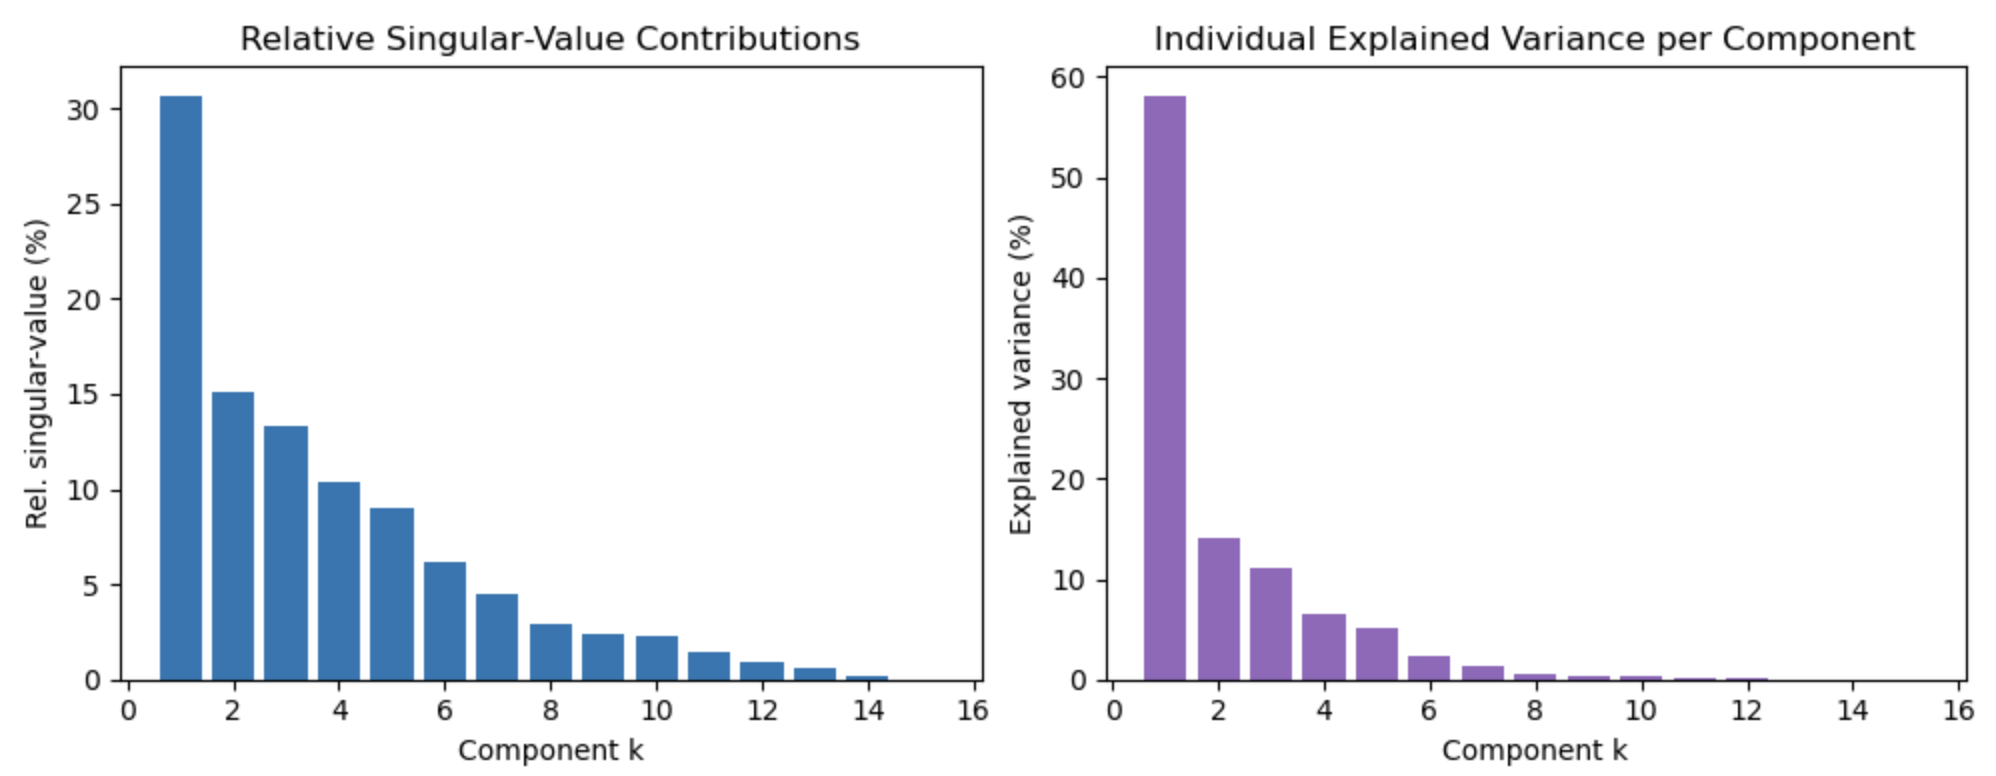

In [18]:
Image("image1.png")

**Figure 1:** *i) Relative Singular-Value Contributions                          ii) Individual Explained Variance per Component*



**Visualizing the Singular Value Energy Drop-off**

This figure plots each component’s share of the total singular‐value “energy” in descending order.  
The first component alone accounts for roughly 30%, the second about 15%, and by the fifth it’s below 6%, indicating that most of the signal is captured by just the first few components.




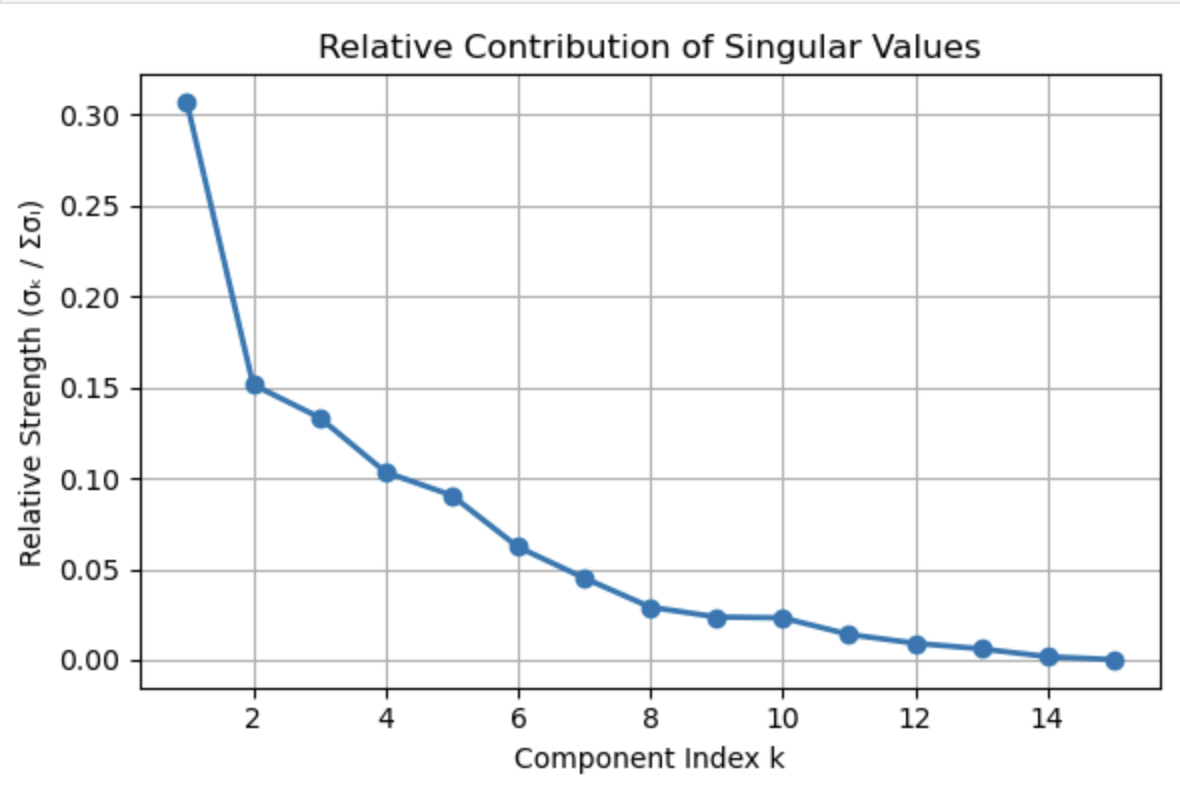

In [22]:
Image("image2.png", width=600, height=600)

**Figure 2:** *Relative Contributions of Singular Values*



**2. Individual Explained Variance (PVE):**

Figure 3 shows how the total variance in standardized emission data accumulates as more SVD components are included.  
Component 1 alone captures **58%** of the variance, Component 2 captures **14%**, and Component 3 captures **11%**.  
By Component 4, about **90%** of the variance is explained, and by Component 8 it's up near **98%**.  
This confirms that a low‐dimensional embedding (e.g., **k = 5–8**) captures nearly all the meaningful structure in the full 17-feature space.



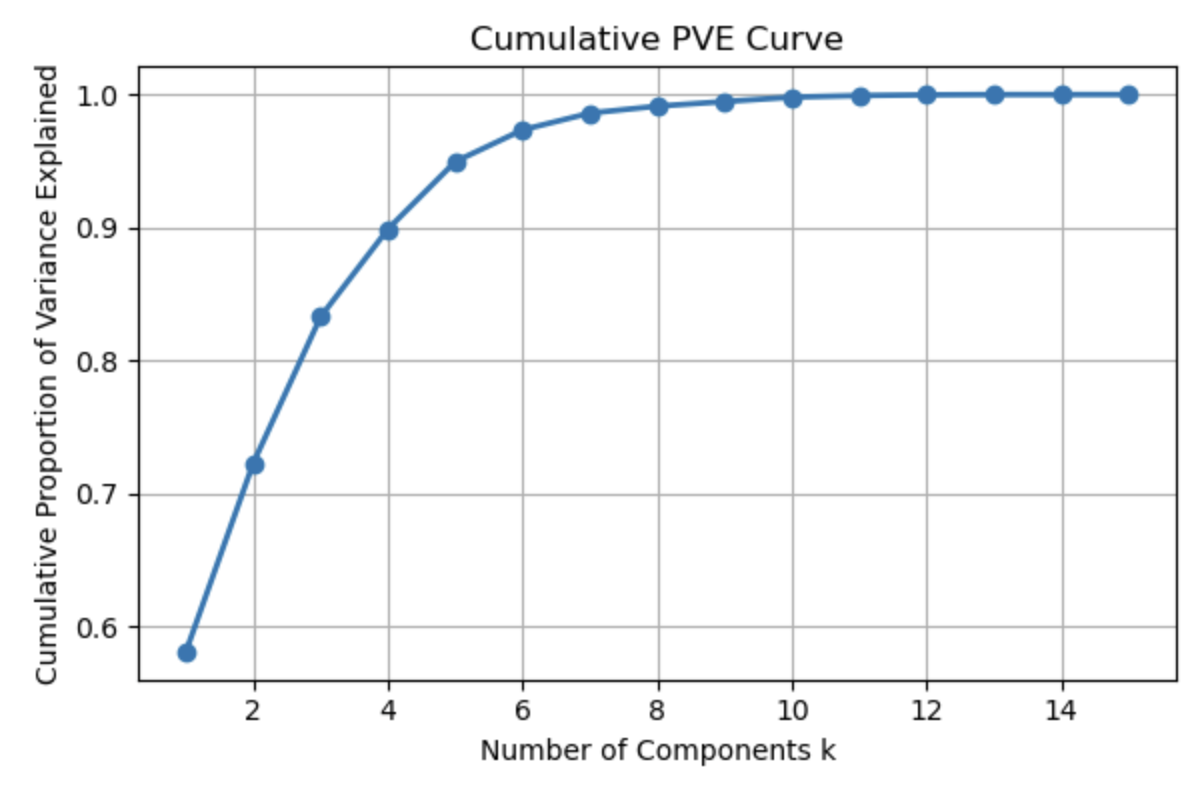

In [25]:
Image("image3.png", width=600, height=600)

**Figure 3:** *Cumulative Proportional Variance Explained Curve*



**3. Reconstruction Error vs. Rank:**

Figure 4 illustrates how well the original standardized data matrix can be approximated by reconstructing it using only the top **k** singular values and vectors.  
- With **k = 1**, the reconstruction error is nearly **60%**.  
- With **k = 4**, the error drops to about **30%**.  
- With **k = 10**, the error reduces to only **4%**.

This shows that **k between 5 to 8** offers a good trade-off between complexity and accuracy.

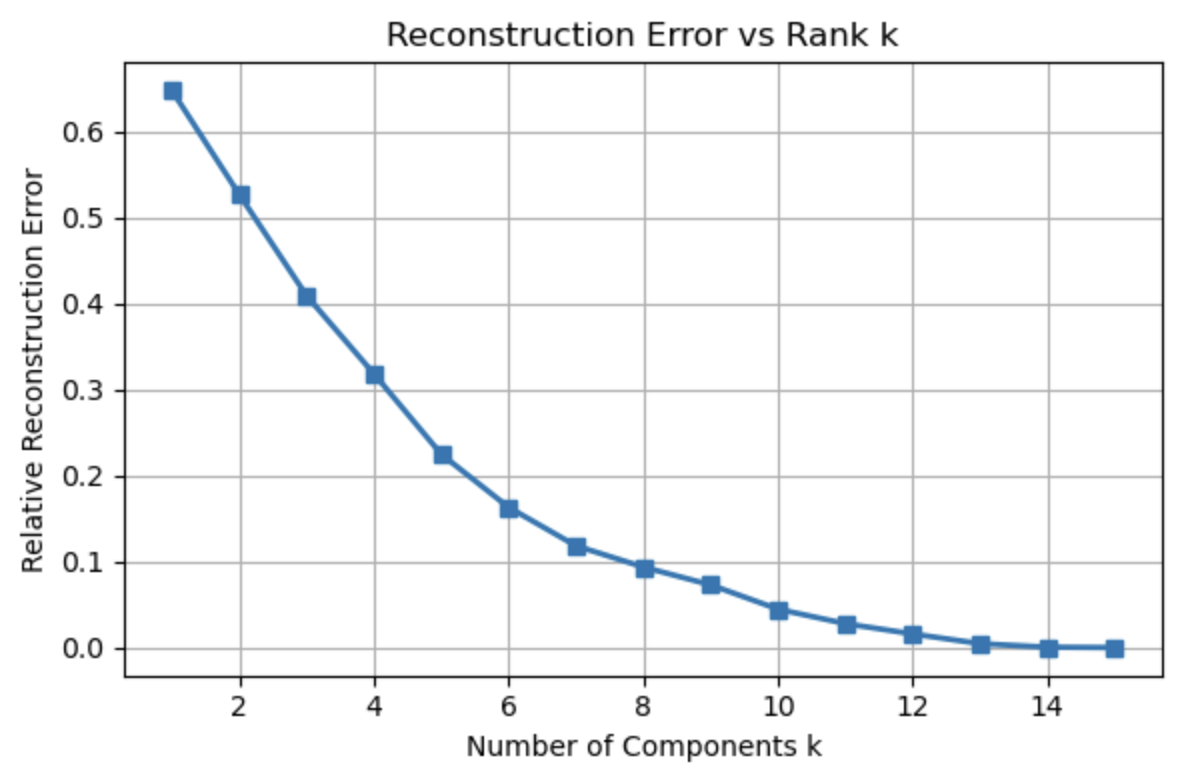

In [27]:
Image("image4.png", width=600, height=600)

**Figure 4:** *Reconstruction Error vs Rank k*



**4. Matrix Completion with RMSE:**

When randomly masking the data and reconstructing with truncated SVD:  
- **Rank M = 3** gives the **lowest RMSE** across all missing data fractions (from 5% to 30%).  
- Ranks greater than about **4** tend to **overfit** the observed entries and perform **worse on the missing values**.

This supports the idea that lower-rank approximations (M = 3–4) are more robust for matrix completion.


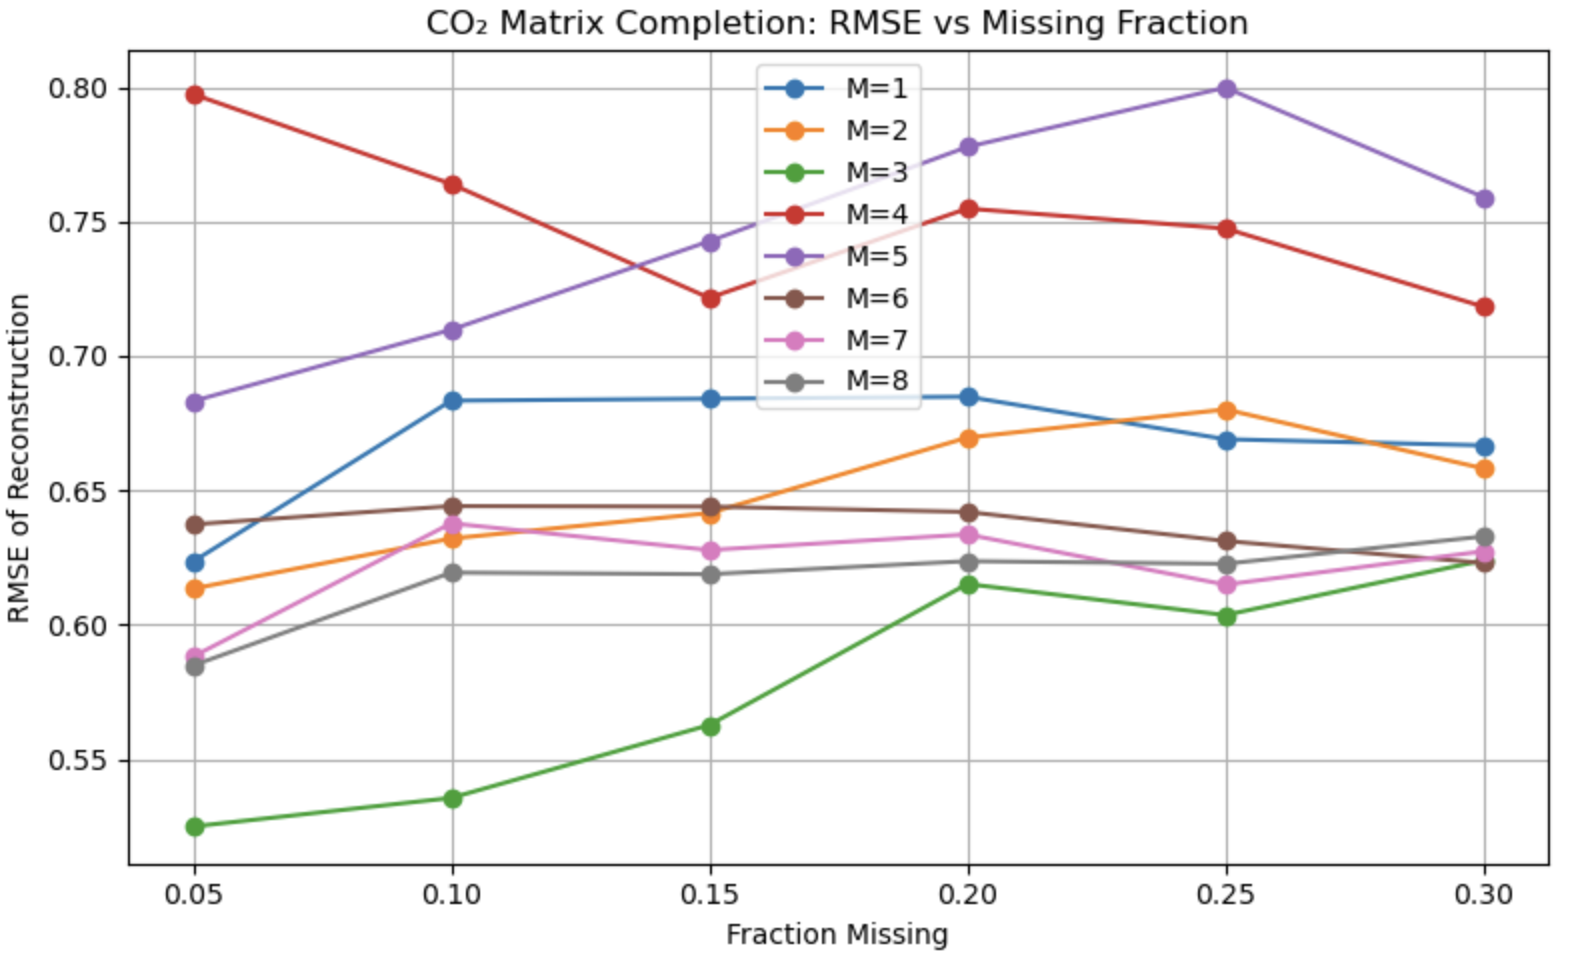

In [28]:
Image("image5.png", width=600, height=600)

**Figure 5:** *CO₂ Matrix Completion Using Truncated SVD*

---

### K-MEANS CLUSTERING

#### Cluster Assessments

1) **Elbow Method**  
The optimal number of clusters is likely 5, since increasing *k* beyond this point doesn’t significantly reduce WCSS. Choosing more clusters would overcomplicate the model without meaningful gain.




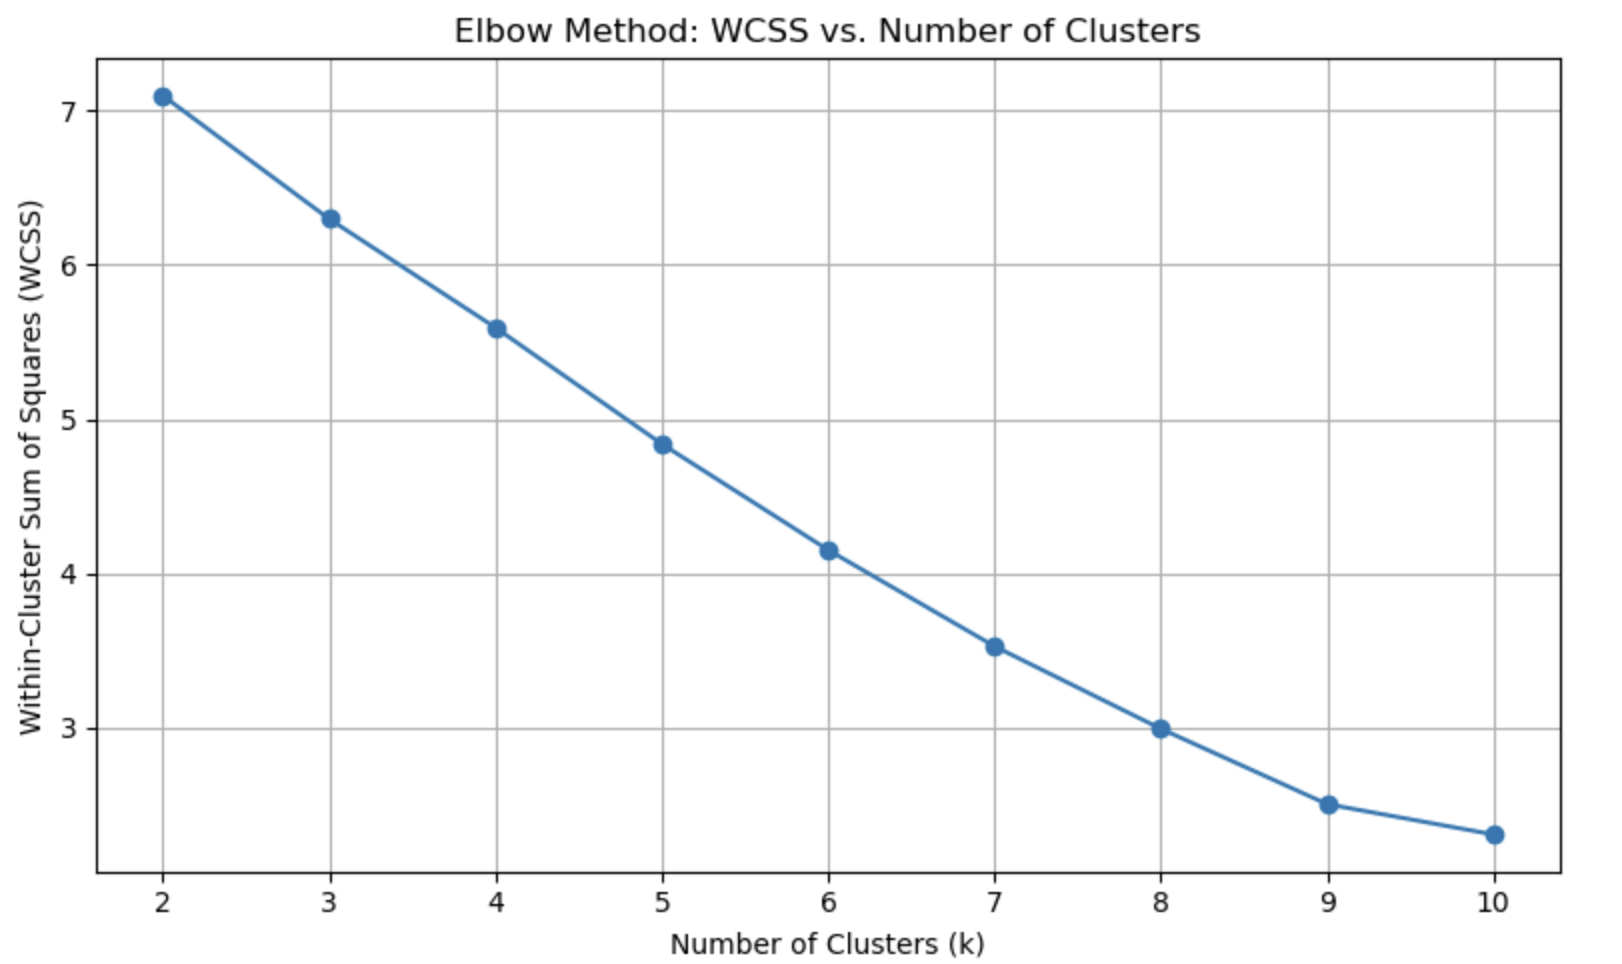

In [29]:
Image("image6.png", width=600, height=600)

**Figure 6:** *WCSS vs Number of Clusters*

2) **Silhouette Score**  
The optimal number of clusters is *k = 5*. It offers the best trade-off between cohesion and separation, with the highest silhouette score among the tested values. Clustering beyond this point introduces fragmentation without meaningful structure.

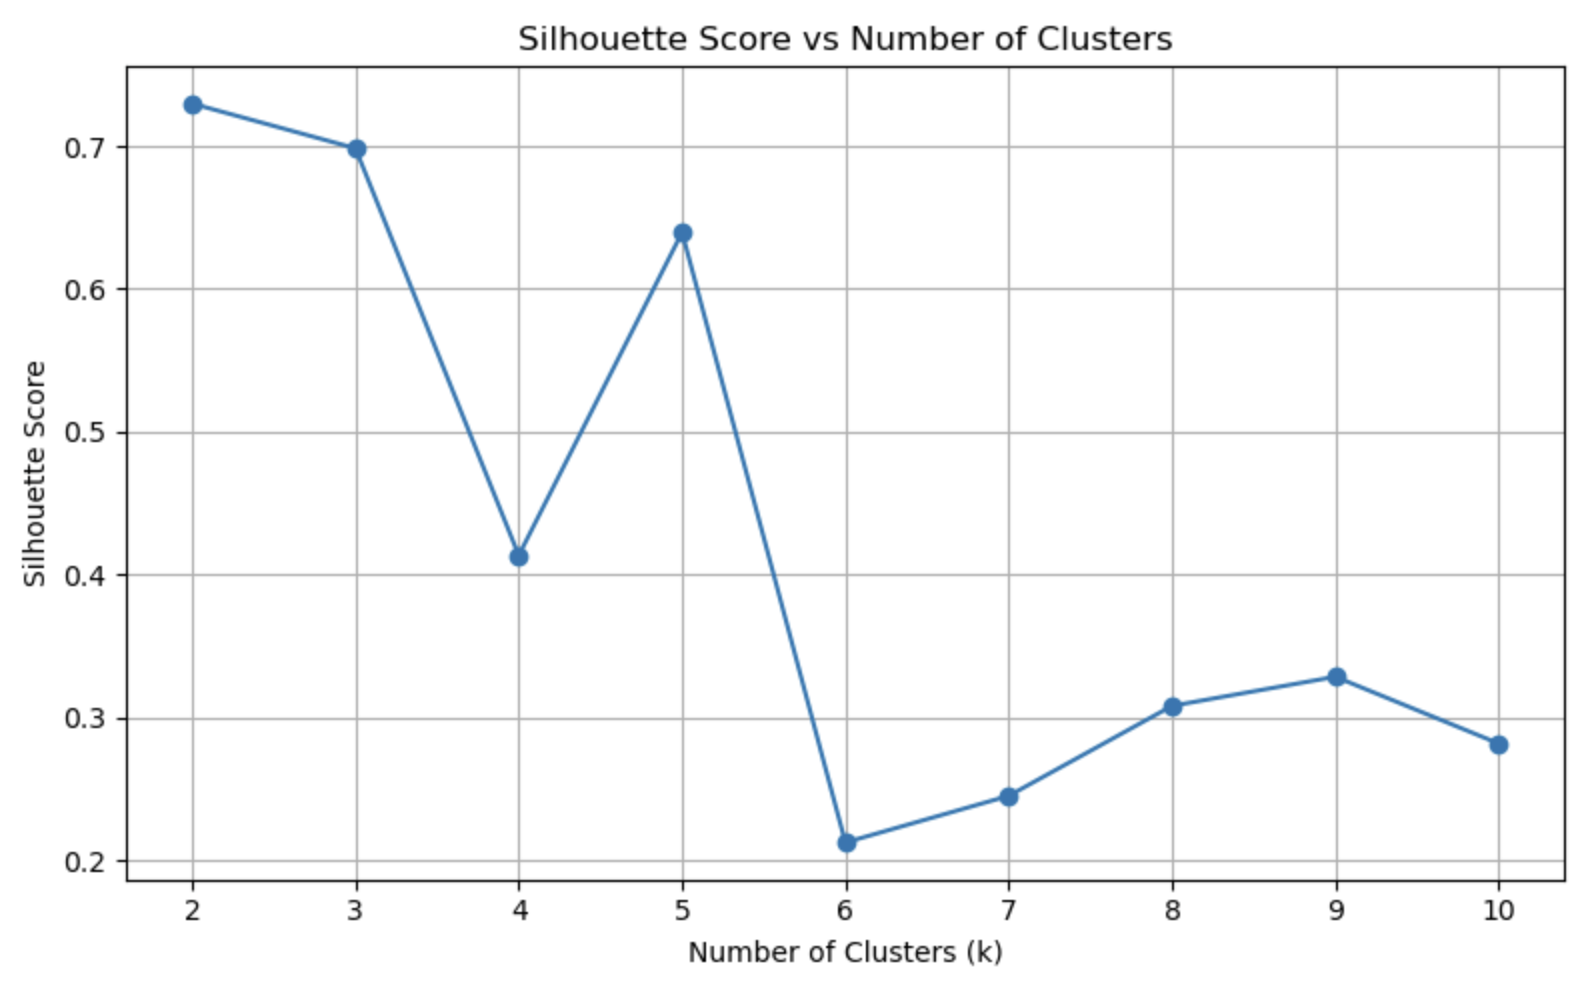

In [30]:
Image("image7.png", width=600, height=600)

**Figure 7:** *Silhouette Score vs Number of Clusters*

#### SVD Space – Clusters

The SVD plot reveals 5 well-formed clusters in reduced-dimension space. Most clusters are compact and distinct, validating the choice of *k = 5*. Component 1 appears to play a bigger role in separating the green and red clusters, while Component 2 helps differentiate orange and purple.

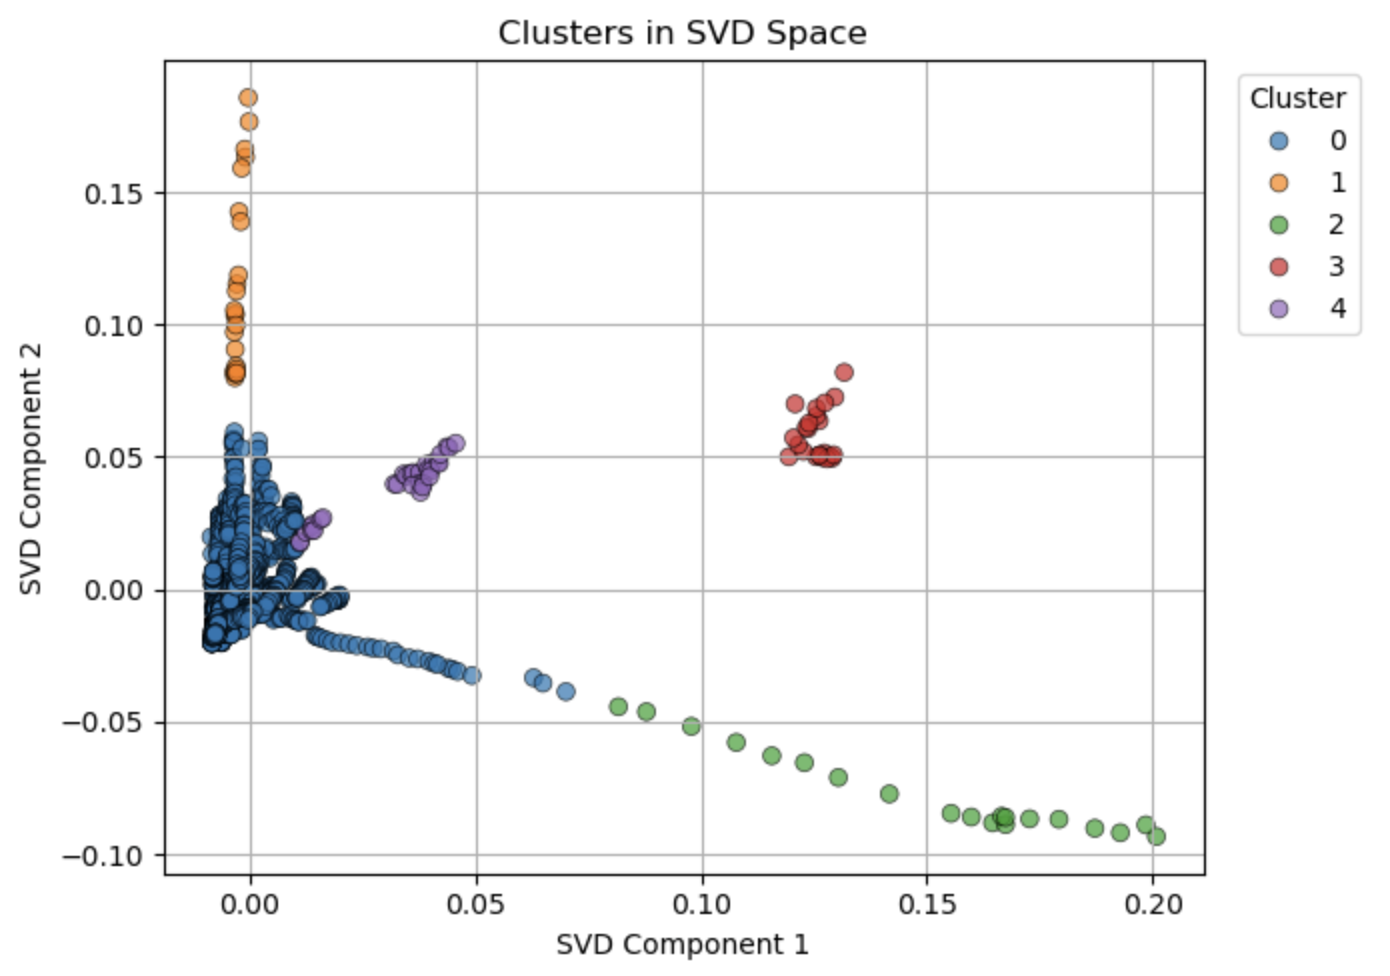

In [31]:
Image("image8.png", width=600, height=600)

**Figure 8:** *Clusters in SVD Space*

#### Cluster Membership

The vast majority of observations belong to Cluster 0, showing strong stability in emission patterns for most countries over time. The smaller clusters (1–4) capture specific or exceptional profiles that are rare and consistent year-to-year, rather than emerging or disappearing trends.

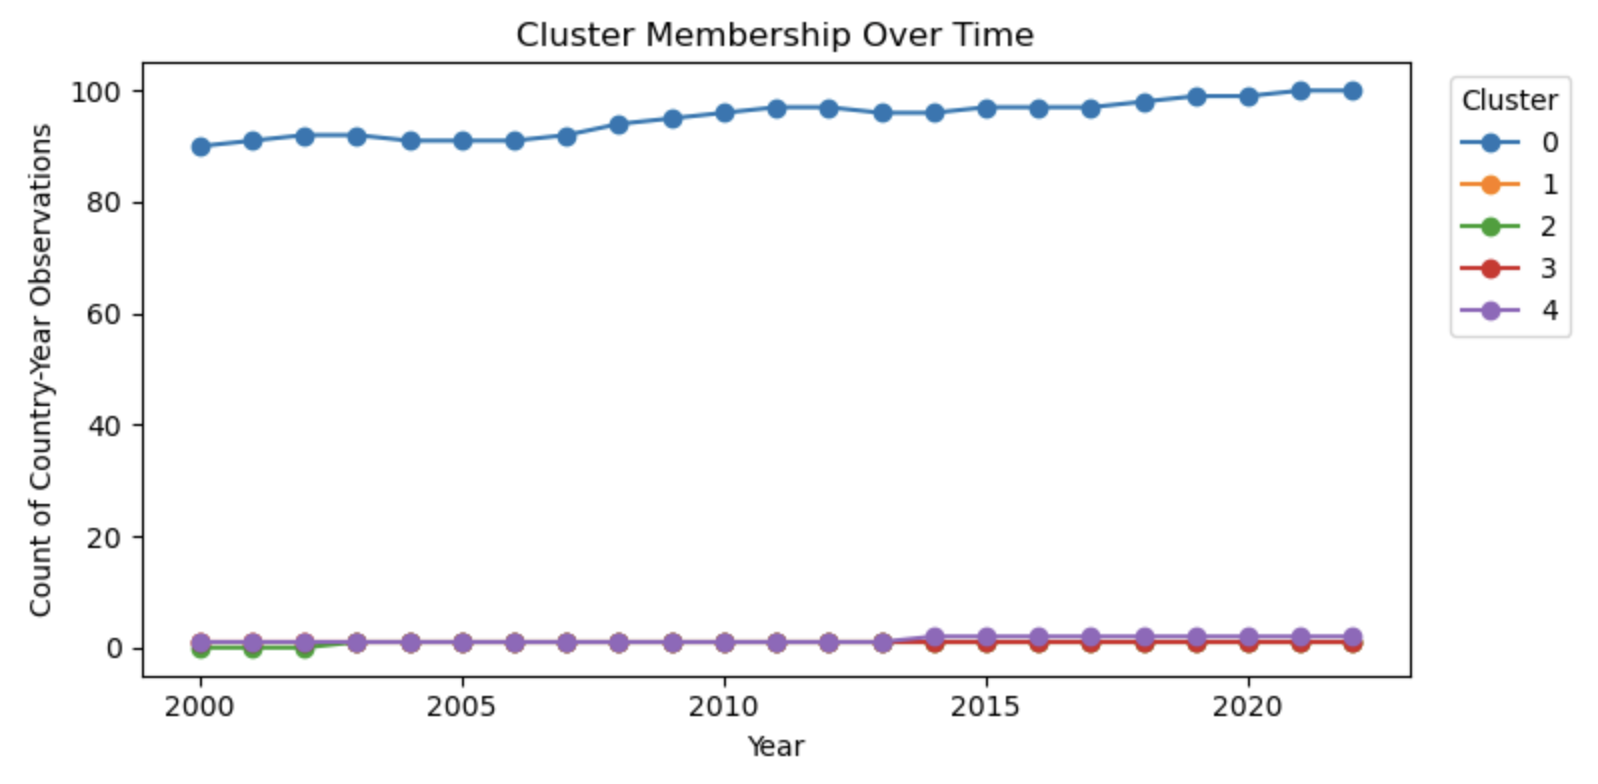

In [32]:
Image("image9.png", width=600, height=600)

**Figure 9:** *Clusters Membership over Time*

---


### HIERARCHICAL CLUSTERING

#### Dendrograms

Complete and Average linkage provide the best clustering structure based on silhouette scores (0.75 and 0.72).  
Ward linkage, while commonly used, performs poorly here (0.35) — possibly due to unbalanced cluster sizes.  
Single linkage does okay (0.69), but beware of chaining and over-merged clusters.



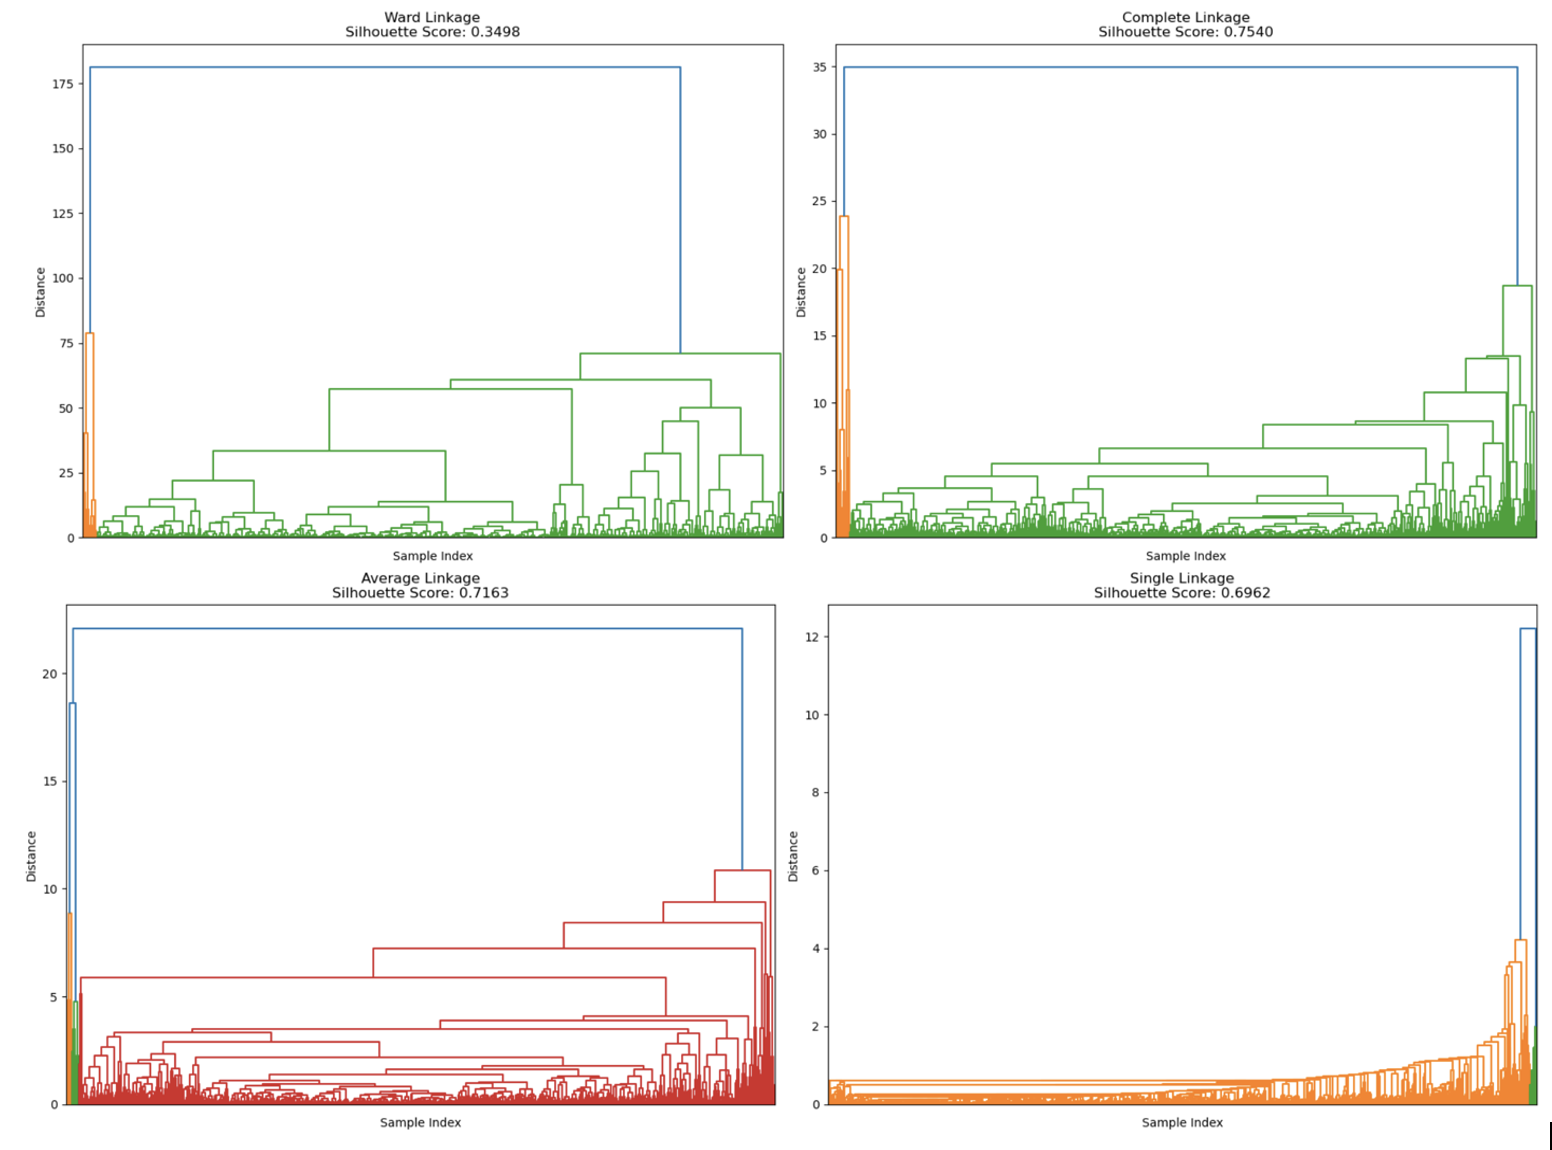

In [34]:
Image("image10.png", width=800, height=800)

**Figure 10:** Dendrograms for Different Linkage Methods

#### K-Means vs Hierarchical Clustering

Both methods identify similar global structure (with 5 main groupings), but they differ in boundary definition and assignment.  
• K-Means creates compact, evenly distributed clusters, ideal for spherical groupings.  
• Complete Linkage emphasizes separation, resulting in more elongated or irregular clusters — especially when groups differ in density or shape.

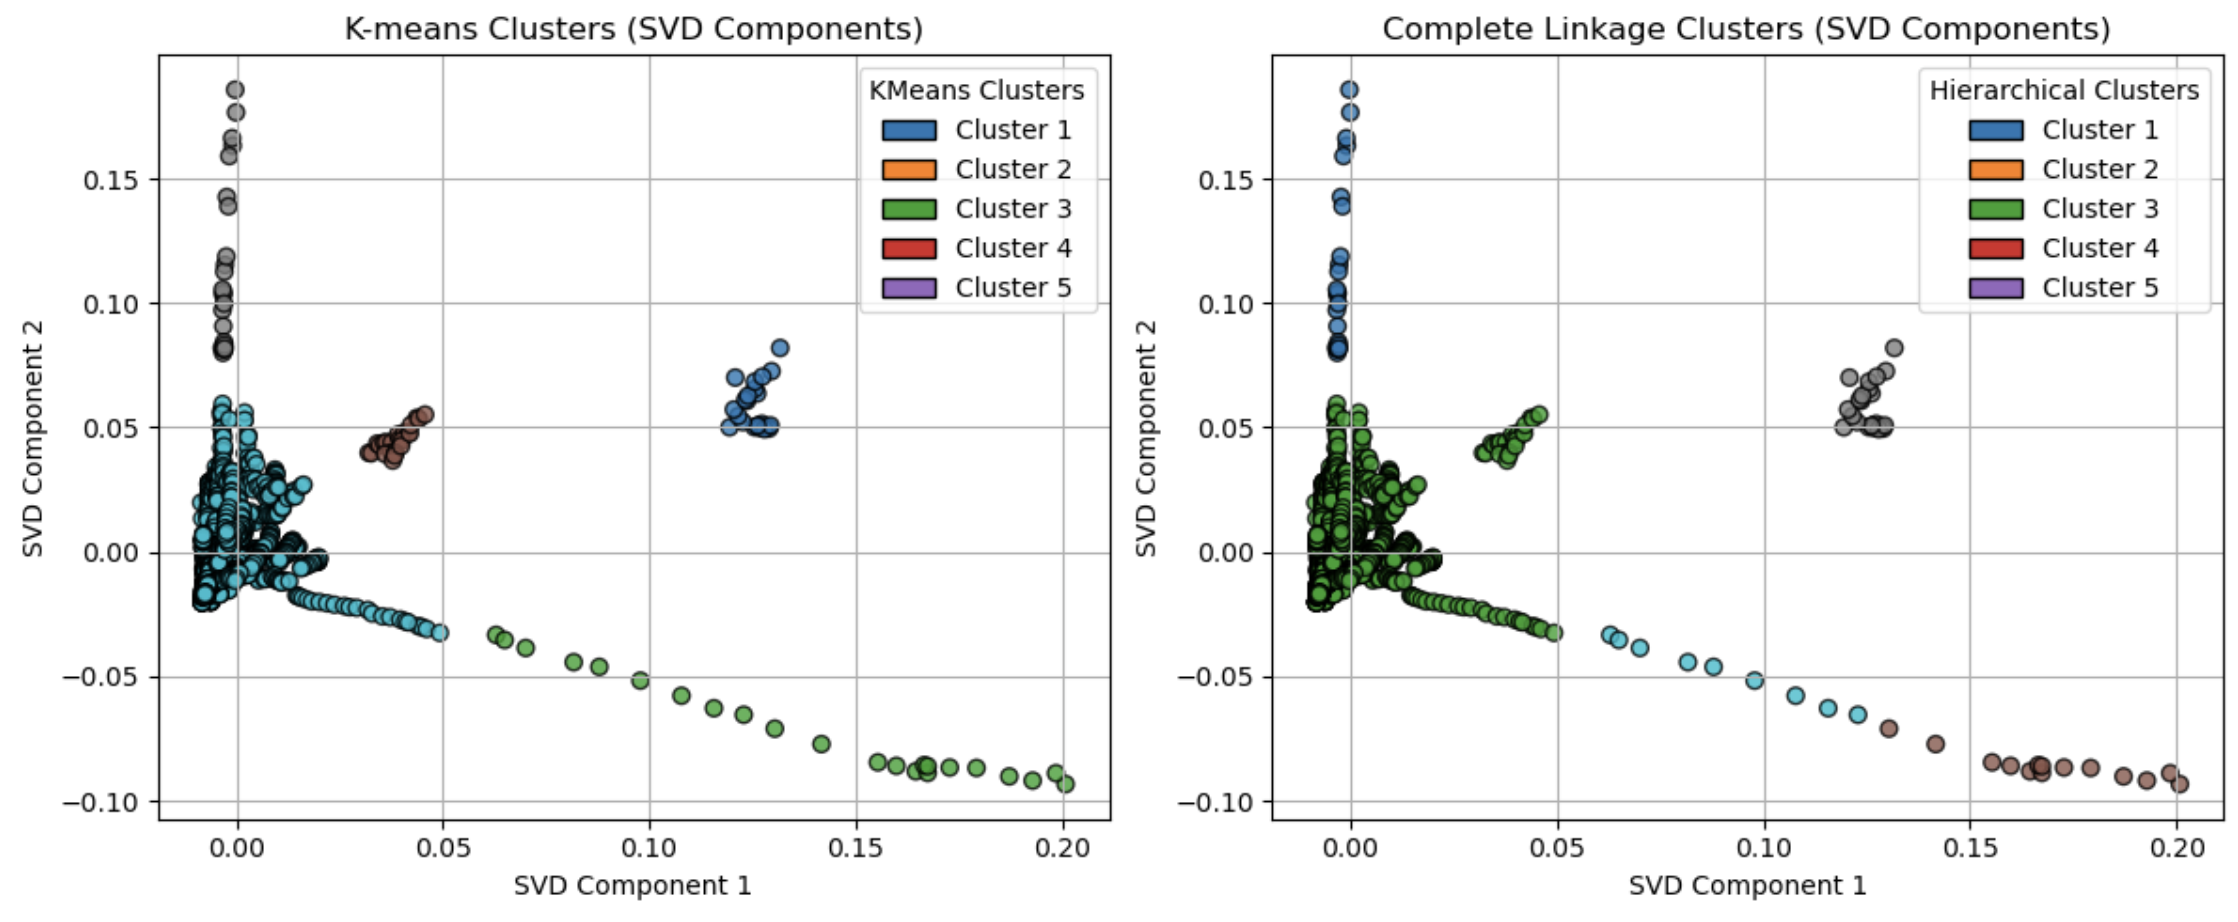

In [35]:
Image("image11.png", width=600, height=600)

**Figure 11:** Comparison Plots of K-Means and Complete Hierarchical Clustering

---


### Clustering Method Comparison

| Method           | Optimal Clusters | Silhouette Score |
|------------------|------------------|------------------|
| SVD + K-means    | 5                | 0.657            |
| SVD + Complete   | 5                | 0.629            |

SVD with K-means produced the best cluster separation with a silhouette score of 0.657, outperforming hierarchical (complete) clustering.

#### COUNTRIES VS EMISSION PATTERNS

These cluster labels provide a policy-relevant and interpretable summary of how countries differ in their emission patterns:

• Clusters 1 and 4 represent wealthier, high-emission countries — but for different reasons (fossil fuel reliance vs. overall per-capita consumption).  
• Cluster 2 highlights countries managing emissions effectively, often with strong energy policies.  
• Clusters 3 and 5 capture developing economies heavily reliant on coal and cement — possibly different in scale or region.

| Cluster | Label                   | Key Traits                                         | Countries (Examples)                         |
|---------|-------------------------|----------------------------------------------------|----------------------------------------------|
| 1       | Oil & Gas Dependent     | High per-capita emissions from oil/gas             | Qatar                                        |
| 2       | Low-Emission Economies  | Low emissions, efficient energy use                | India, Japan, Germany, Russia, Brazil        |
| 3       | Coal & Cement Economies | High coal/cement CO₂, developing economies         | China                                        |
| 4       | High Per-Capita Emitters| High CO₂/capita, high GDP                          | United States                                |
| 5       | Coal & Cement Economies | High coal/cement CO₂, developing economies         | China                                        |

---


#### PCA

Observing Figures 12 and 13: The PCA plot (PC1 vs PC2) shows clear separation between country clusters, especially along PC1 — capturing major variation like GDP and emission levels. You can actually see structure emerging.  
But in the raw CO₂ vs GDP plot, clusters are more spread out and less distinct — harder to tell apart visually. That’s because raw features can be correlated or skewed, while PCA rotates the space to highlight meaningful variance. So PCA helps reveal patterns that aren’t obvious in the original data.



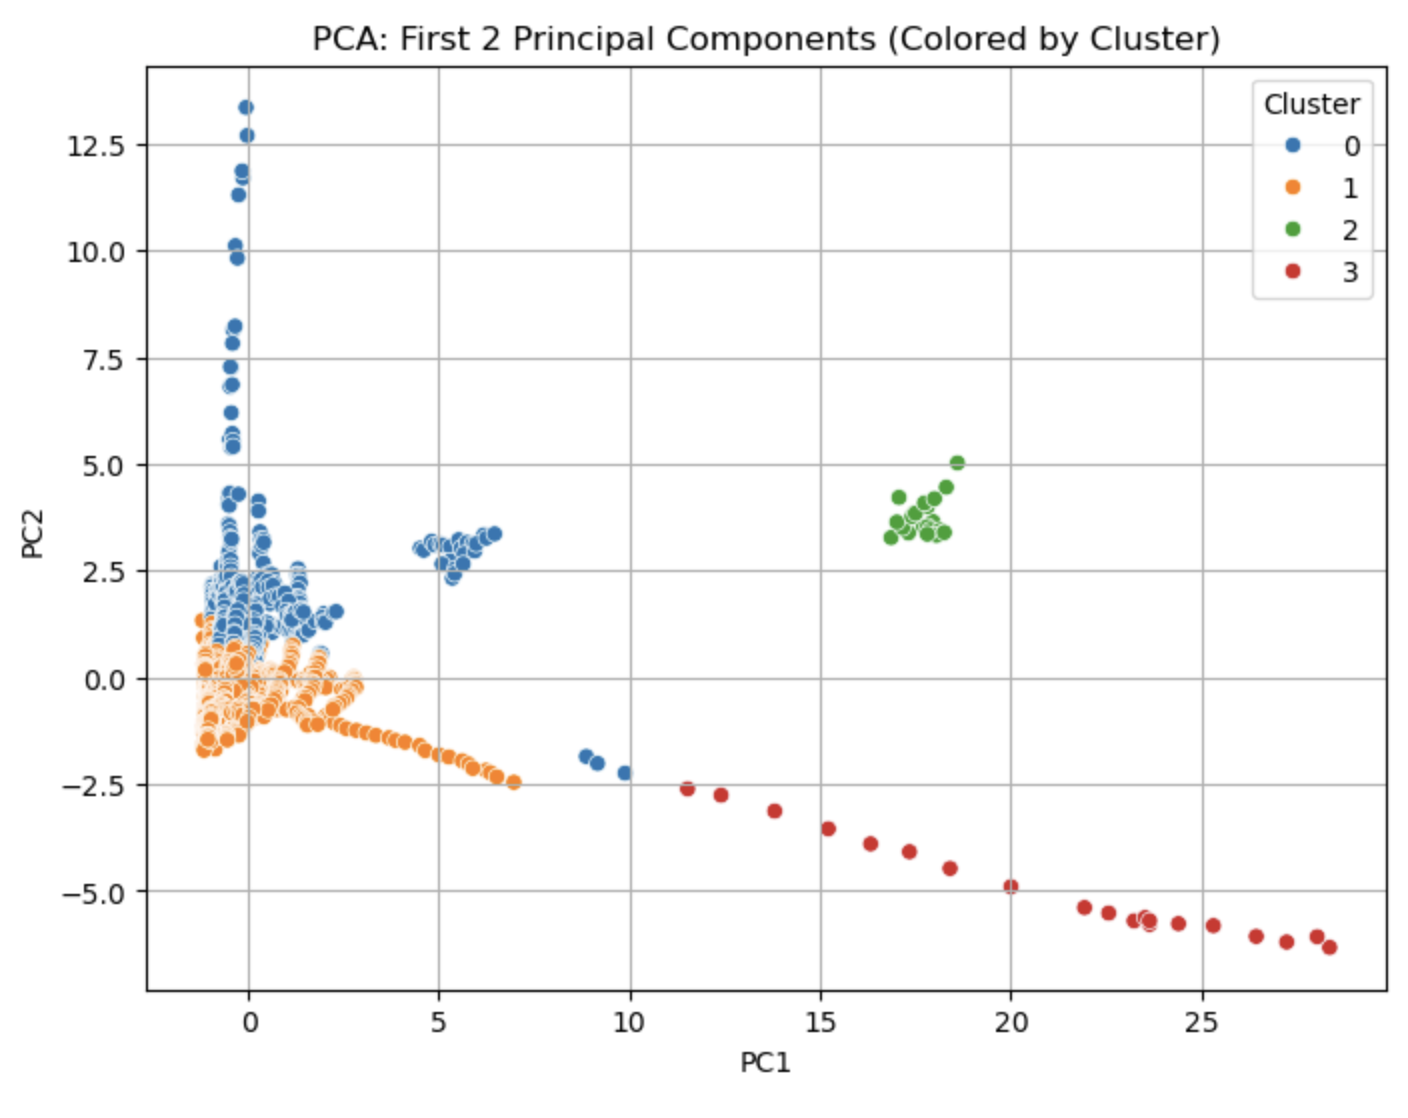

In [38]:
Image("image12.png", width=600, height=600)

Figure 12: PCA: First 2 Principal Components


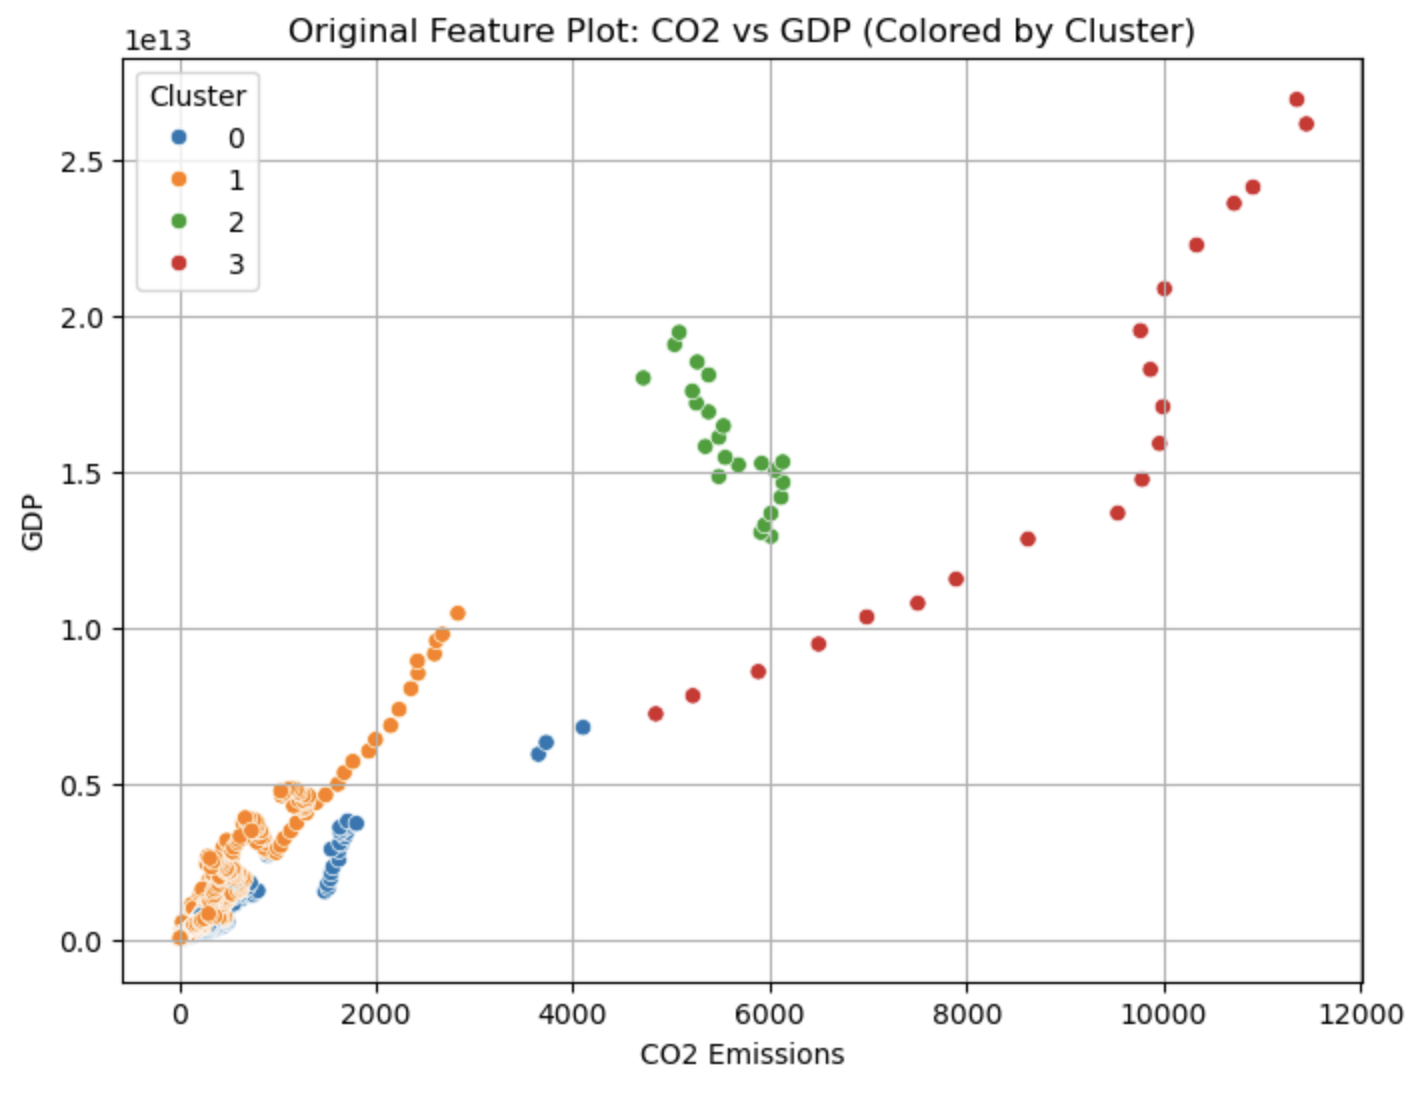

In [37]:
Image("image13.png", width=600, height=600)

Figure 13: CO₂ vs GDP – Original Feature Plot

---

### DISCUSSION:

Our results showed clear structure in country-level emission patterns using SVD and Clustering, while also highlighting some limitations and directions for future exploration.



#### Key Takeaways

**SVD:**
- The top 3 components explained approximately 80% of the total variance.
- Most of the structure was captured early, making SVD highly effective for dimensionality reduction.

**Matrix Completion:**
- A rank-3 reconstruction gave the lowest RMSE across all levels of missing data.
- Higher ranks began to overfit the observed data, worsening performance on missing entries.

**Clustering:**
- **Complete Linkage** had the highest silhouette score (0.754) and formed intuitive clusters (e.g., coal-heavy nations, low-emission groups).
- **K-Means** also performed well (silhouette score = 0.657), and there was strong agreement between both methods (Adjusted Rand Index = 0.849).



#### Limitations

- Some missing or incomplete data may have skewed clustering and reconstruction accuracy.
- Clustering outcomes were sensitive to the number of retained SVD components.
- K-Means assumes spherical clusters, possibly missing non-linear or irregular shapes in the data.



#### Future Work

- Experiment with non-linear dimensionality reduction techniques such as t-SNE and UMAP.
- Explore more flexible clustering algorithms like DBSCAN or Gaussian Mixture Models (GMM).
- Integrate additional features such as population, renewable energy usage, or economic indicators to provide richer contextual insight.

---



### CONCLUSION:

#### Broader Impacts and Real-World Use

This project shows that greenhouse gas emission patterns across countries are not random but structured, and a few core factors explain most of the variations. Using SVD, we found that just the top 3–5 components capture most of the signal. This allows for significant simplification of the data without sacrificing key insights.

In the real world, this kind of structure is valuable:

- Policy makers can group countries with similar emission profiles to design more targeted and fair climate strategies.
- Global organizations like the UN or World Bank can prioritize action by identifying which countries share similar energy or industrial footprints.
- Analysts and researchers can build faster, more efficient models by focusing only on the most informative dimensions.

The clustering results add another clear layer of interpretability. Distinct groups emerged, such as oil-heavy economies, coal-driven industrial countries, and low-emission efficient nations. These clusters can guide international negotiations and foster meaningful cooperation.

Overall, this work demonstrates how unsupervised machine learning can transform complex environmental data into actionable insights that support smarter, more equitable global climate decisions.

---


### References

1. **Our World in Data. (2024). CO₂ and Greenhouse Gas Emissions Dataset.**  
   Retrieved from [https://github.com/owid/co2-data](https://github.com/owid/co2-data)  
   - Our Primary Dataset, providing CO₂ and greenhouse gas emissions by country and year.


2. **Ritchie, H., Roser, M., & Rosado, P. (2020). CO₂ and Greenhouse Gas Emissions.**  
   Our World in Data. Retrieved from [https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions)  
   - Contextual and explanatory resource on emissions trends and causes.


3. **Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments.**  
   *Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences*, 374(2065), 20150202.  
   - Key reference for the PCA methodology used in dimensionality reduction and feature analysis.


4. **MacQueen, J. (1967). Some Methods for Classification and Analysis of Multivariate Observations.**  
   In *Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability* (Vol. 1, pp. 281–297). University of California Press.  
   - Original paper proposing the k-means clustering algorithm.


5. **Rokach, L., & Maimon, O. (2005). Clustering methods.**  
   In *Data Mining and Knowledge Discovery Handbook* (pp. 321–352). Springer.  
   - Comprehensive overview of clustering techniques, including hierarchical and centroid-based methods.


6. **IPCC. (2023). Climate Change 2023: Synthesis Report.**  
   Intergovernmental Panel on Climate Change. Retrieved from [https://www.ipcc.ch/report/ar6/syr/](https://www.ipcc.ch/report/ar6/syr/)  
   - Provides background on the global climate impact and relevance of greenhouse gas emissions data.


7. **Kaufman, L., & Rousseeuw, P. J. (2009). Finding Groups in Data: An Introduction to Cluster Analysis.**  
   Wiley.  
   - Foundational text for evaluating clustering results like silhouette scores and interpreting cluster quality.


